<a href="https://colab.research.google.com/github/CptK1ng/dmc2019/blob/master/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

To edit in colab click button above ([or here](https://colab.research.google.com/github/CptK1ng/dmc2019/blob/master/notebooks/EDA.ipynb)) or import from github via the colab menu and connect github to google account.

To save, connect github to google account and select File → Save a copy in GitHub, select right repo and set filename to _notebooks/EDA.ipynb_ . 

## Import

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics
%matplotlib inline

Download Dataset:

In [4]:
!wget -nc https://www.data-mining-cup.com/download/dmc-2019-task/?wpdmdl=1936 -O DMC_2019_task.zip && unzip -o DMC_2019_task.zip #; rm DMC_2019_task.zip #; ls DMC_2019_task

File ‘DMC_2019_task.zip’ already there; not retrieving.


Import Data:

In [14]:
df_train_original = pd.read_csv("DMC_2019_task/train.csv", sep="|")
df_test_original = pd.read_csv("DMC_2019_task/test.csv", sep="|")
df_train_original.head(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0


## Analysis

### Fraud Distribution

In [6]:
df_train_original[['fraud']].describe().T

,count,mean,std,min,25%,50%,75%,max
fraud,1879.0,0.055349,0.22872,0.0,0.0,0.0,0.0,1.0


frauds:

In [8]:
df_train_original[df_train_original['fraud'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
trustLevel,104.0,1.144231,0.353025,1.000000,1.000000,1.000000,1.000000,2.000000
totalScanTimeInSeconds,104.0,1173.913462,471.260881,91.000000,819.000000,1309.500000,1540.500000,1830.000000
grandTotal,104.0,51.034327,30.298933,0.260000,27.072500,48.670000,76.862500,99.820000
lineItemVoids,104.0,6.375000,3.498092,0.000000,3.000000,6.000000,10.000000,11.000000
scansWithoutRegistration,104.0,5.865385,3.211199,0.000000,3.000000,7.000000,8.250000,10.000000
quantityModifications,104.0,2.519231,1.654536,0.000000,1.000000,2.000000,4.000000,5.000000
scannedLineItemsPerSecond,104.0,0.031582,0.034298,0.011692,0.016411,0.020436,0.033966,0.307692
valuePerSecond,104.0,0.053622,0.045918,0.000661,0.026209,0.043697,0.071838,0.230802
lineItemVoidsPerPosition,104.0,0.251412,0.146440,0.000000,0.130435,0.245000,0.379721,0.578947
fraud,104.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


not frauds:

In [9]:
df_train_original[df_train_original['fraud'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
trustLevel,1775.0,3.534085,1.664282,1.000000,2.000000,3.000000,5.000000,6.000000
totalScanTimeInSeconds,1775.0,917.988169,530.102033,2.000000,466.500000,916.000000,1374.000000,1831.000000
grandTotal,1775.0,50.854541,28.867495,0.010000,25.865000,51.260000,77.350000,99.960000
lineItemVoids,1775.0,5.416901,3.442022,0.000000,2.000000,5.000000,8.000000,11.000000
scansWithoutRegistration,1775.0,4.847887,3.127228,0.000000,2.000000,5.000000,7.000000,10.000000
quantityModifications,1775.0,2.525634,1.698295,0.000000,1.000000,3.000000,4.000000,5.000000
scannedLineItemsPerSecond,1775.0,0.059693,0.286364,0.000548,0.007916,0.015873,0.032378,6.666667
valuePerSecond,1775.0,0.210424,1.277445,0.000007,0.028089,0.055407,0.111690,37.870000
lineItemVoidsPerPosition,1775.0,0.774348,1.359578,0.000000,0.163333,0.363636,0.714286,11.000000
fraud,1775.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Correlations between features:

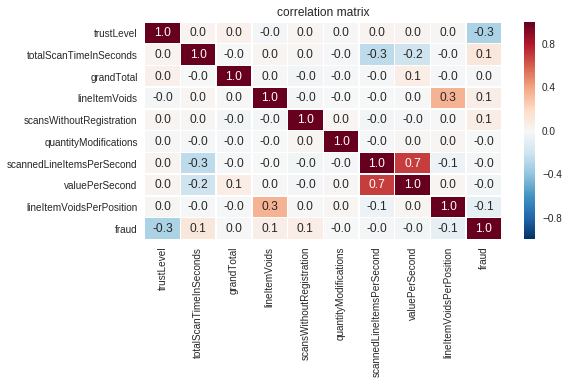

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_train_original.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("correlation matrix")
plt.show()

As we can see, no much correlation, only a little betweeen _scannedLineItemsPerSecond_ and _valuePerSecond_


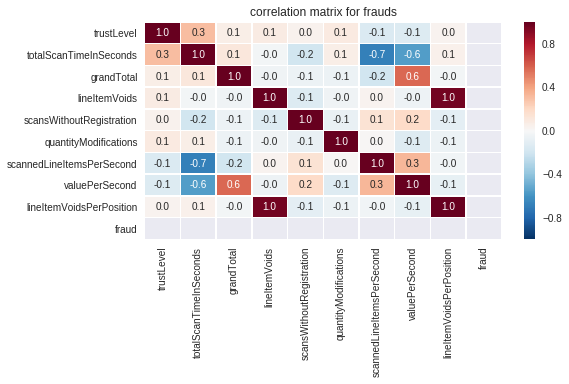

In [11]:
#correlation map for frauds
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_train_original[df_train_original["fraud"] == 1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("correlation matrix for frauds")
plt.show()

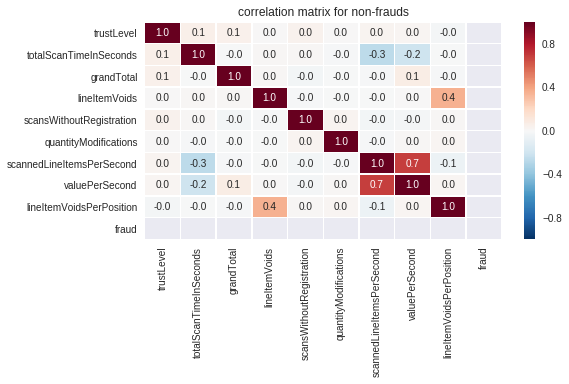

In [12]:
#correlation map for non-frauds
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_train_original[df_train_original["fraud"] == 0].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("correlation matrix for non-frauds")
plt.show()

### Scatter Plots

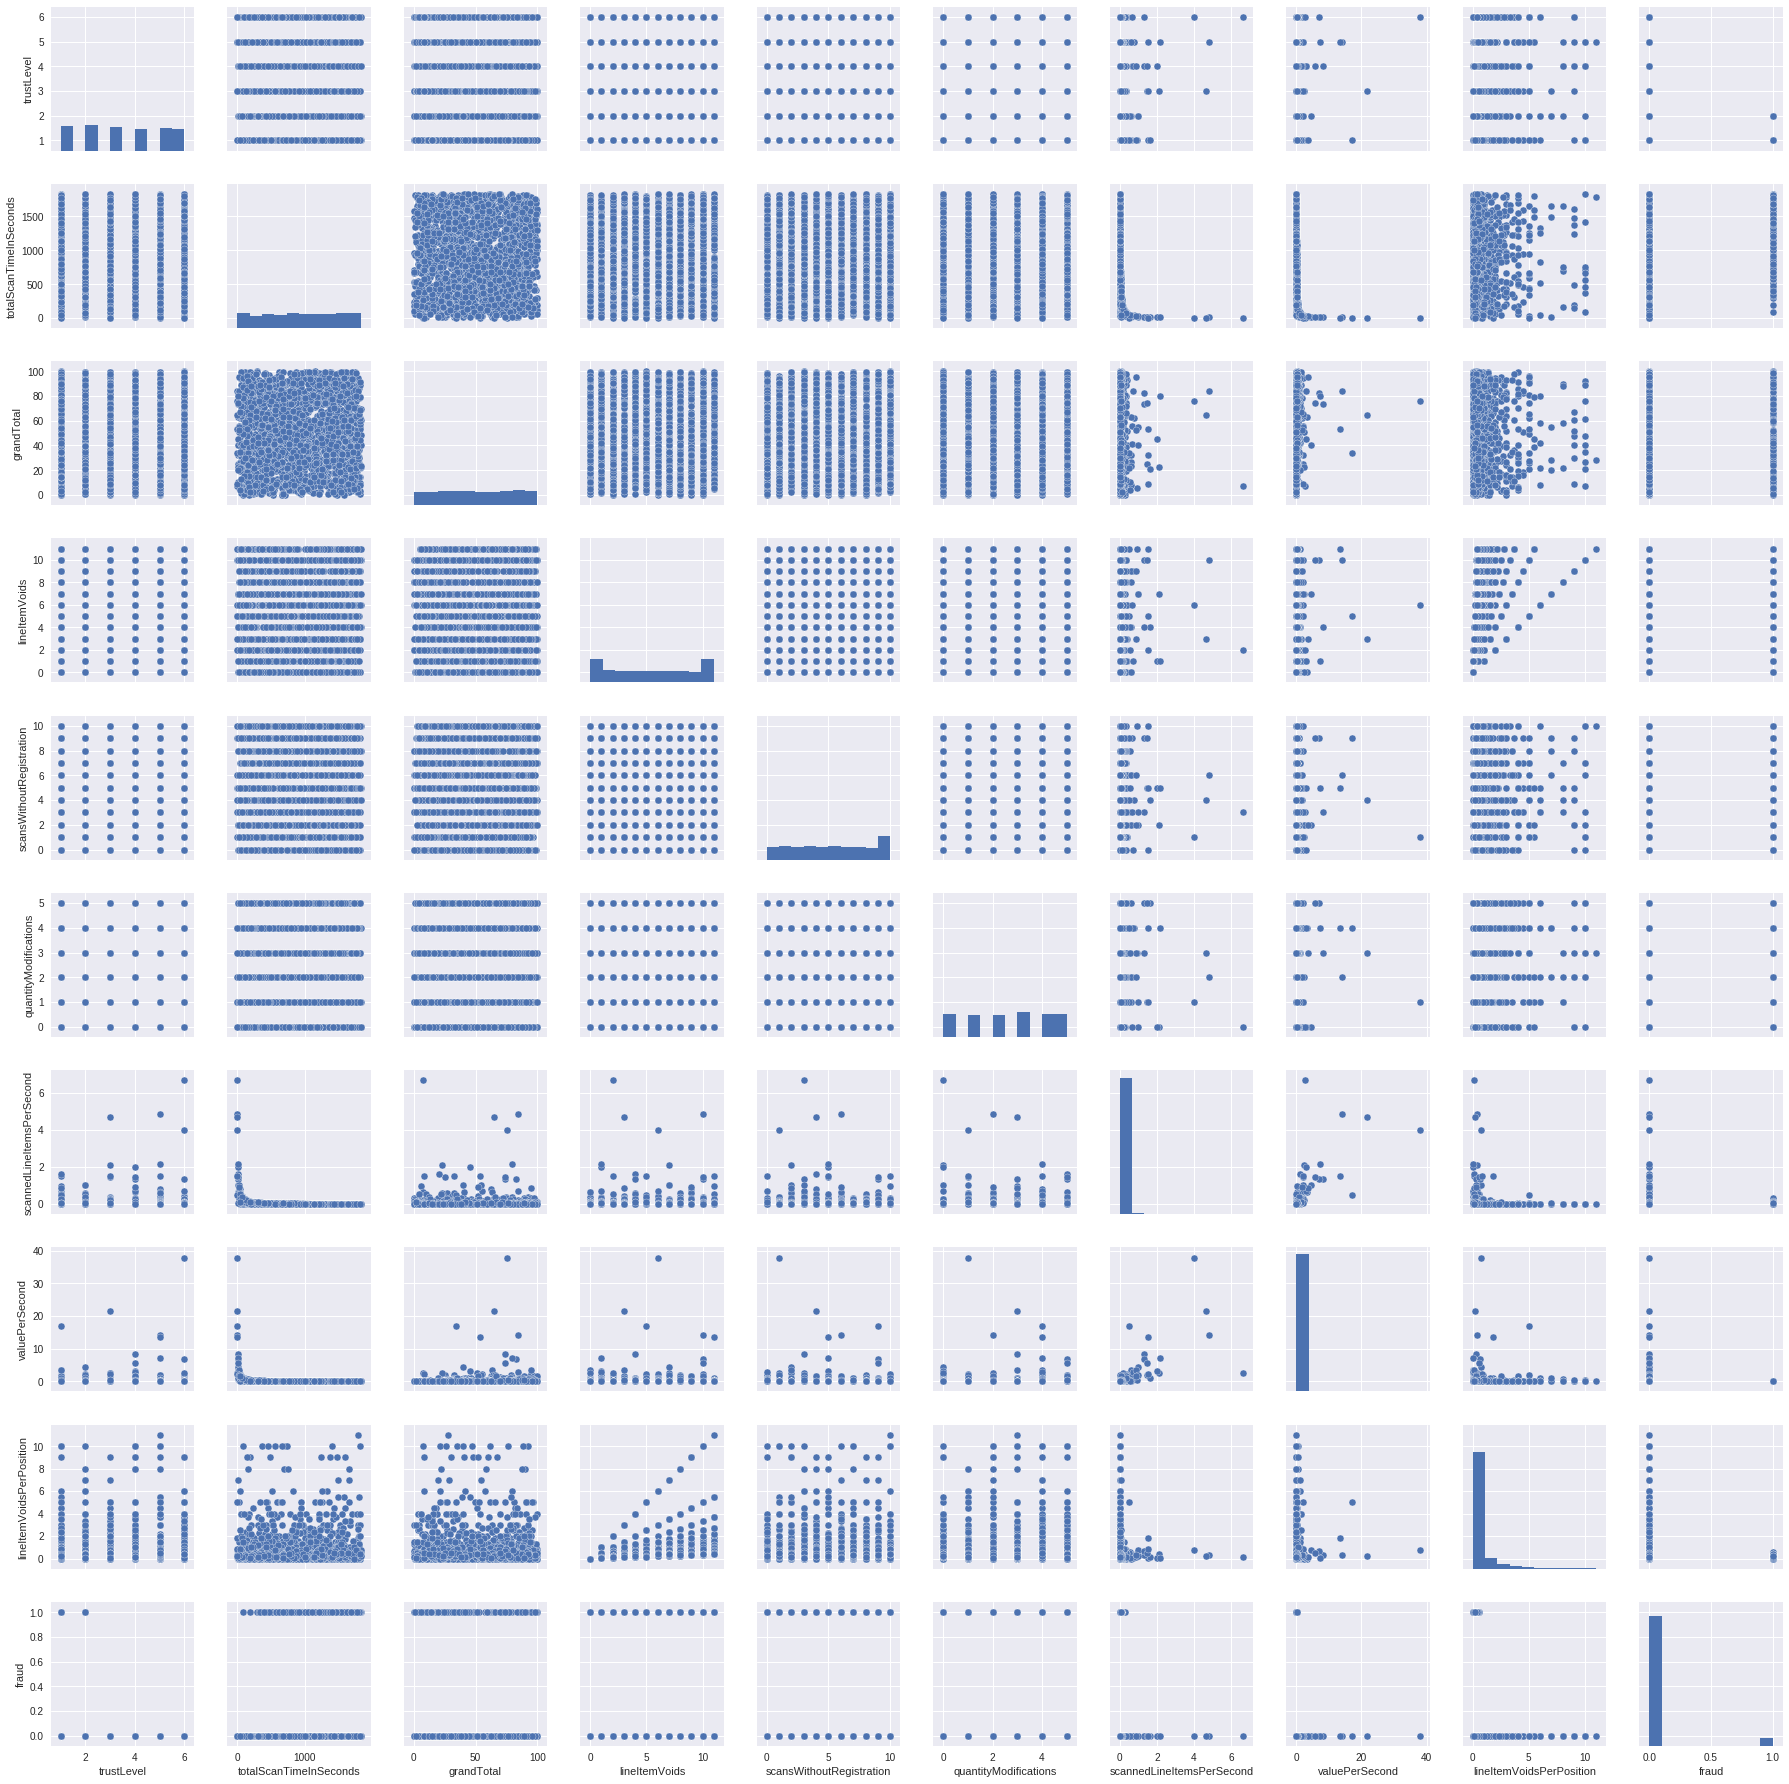

In [0]:
sns.set()
sns.pairplot(df_train_original)
plt.show();

**TODO**: What can we see here?

### 

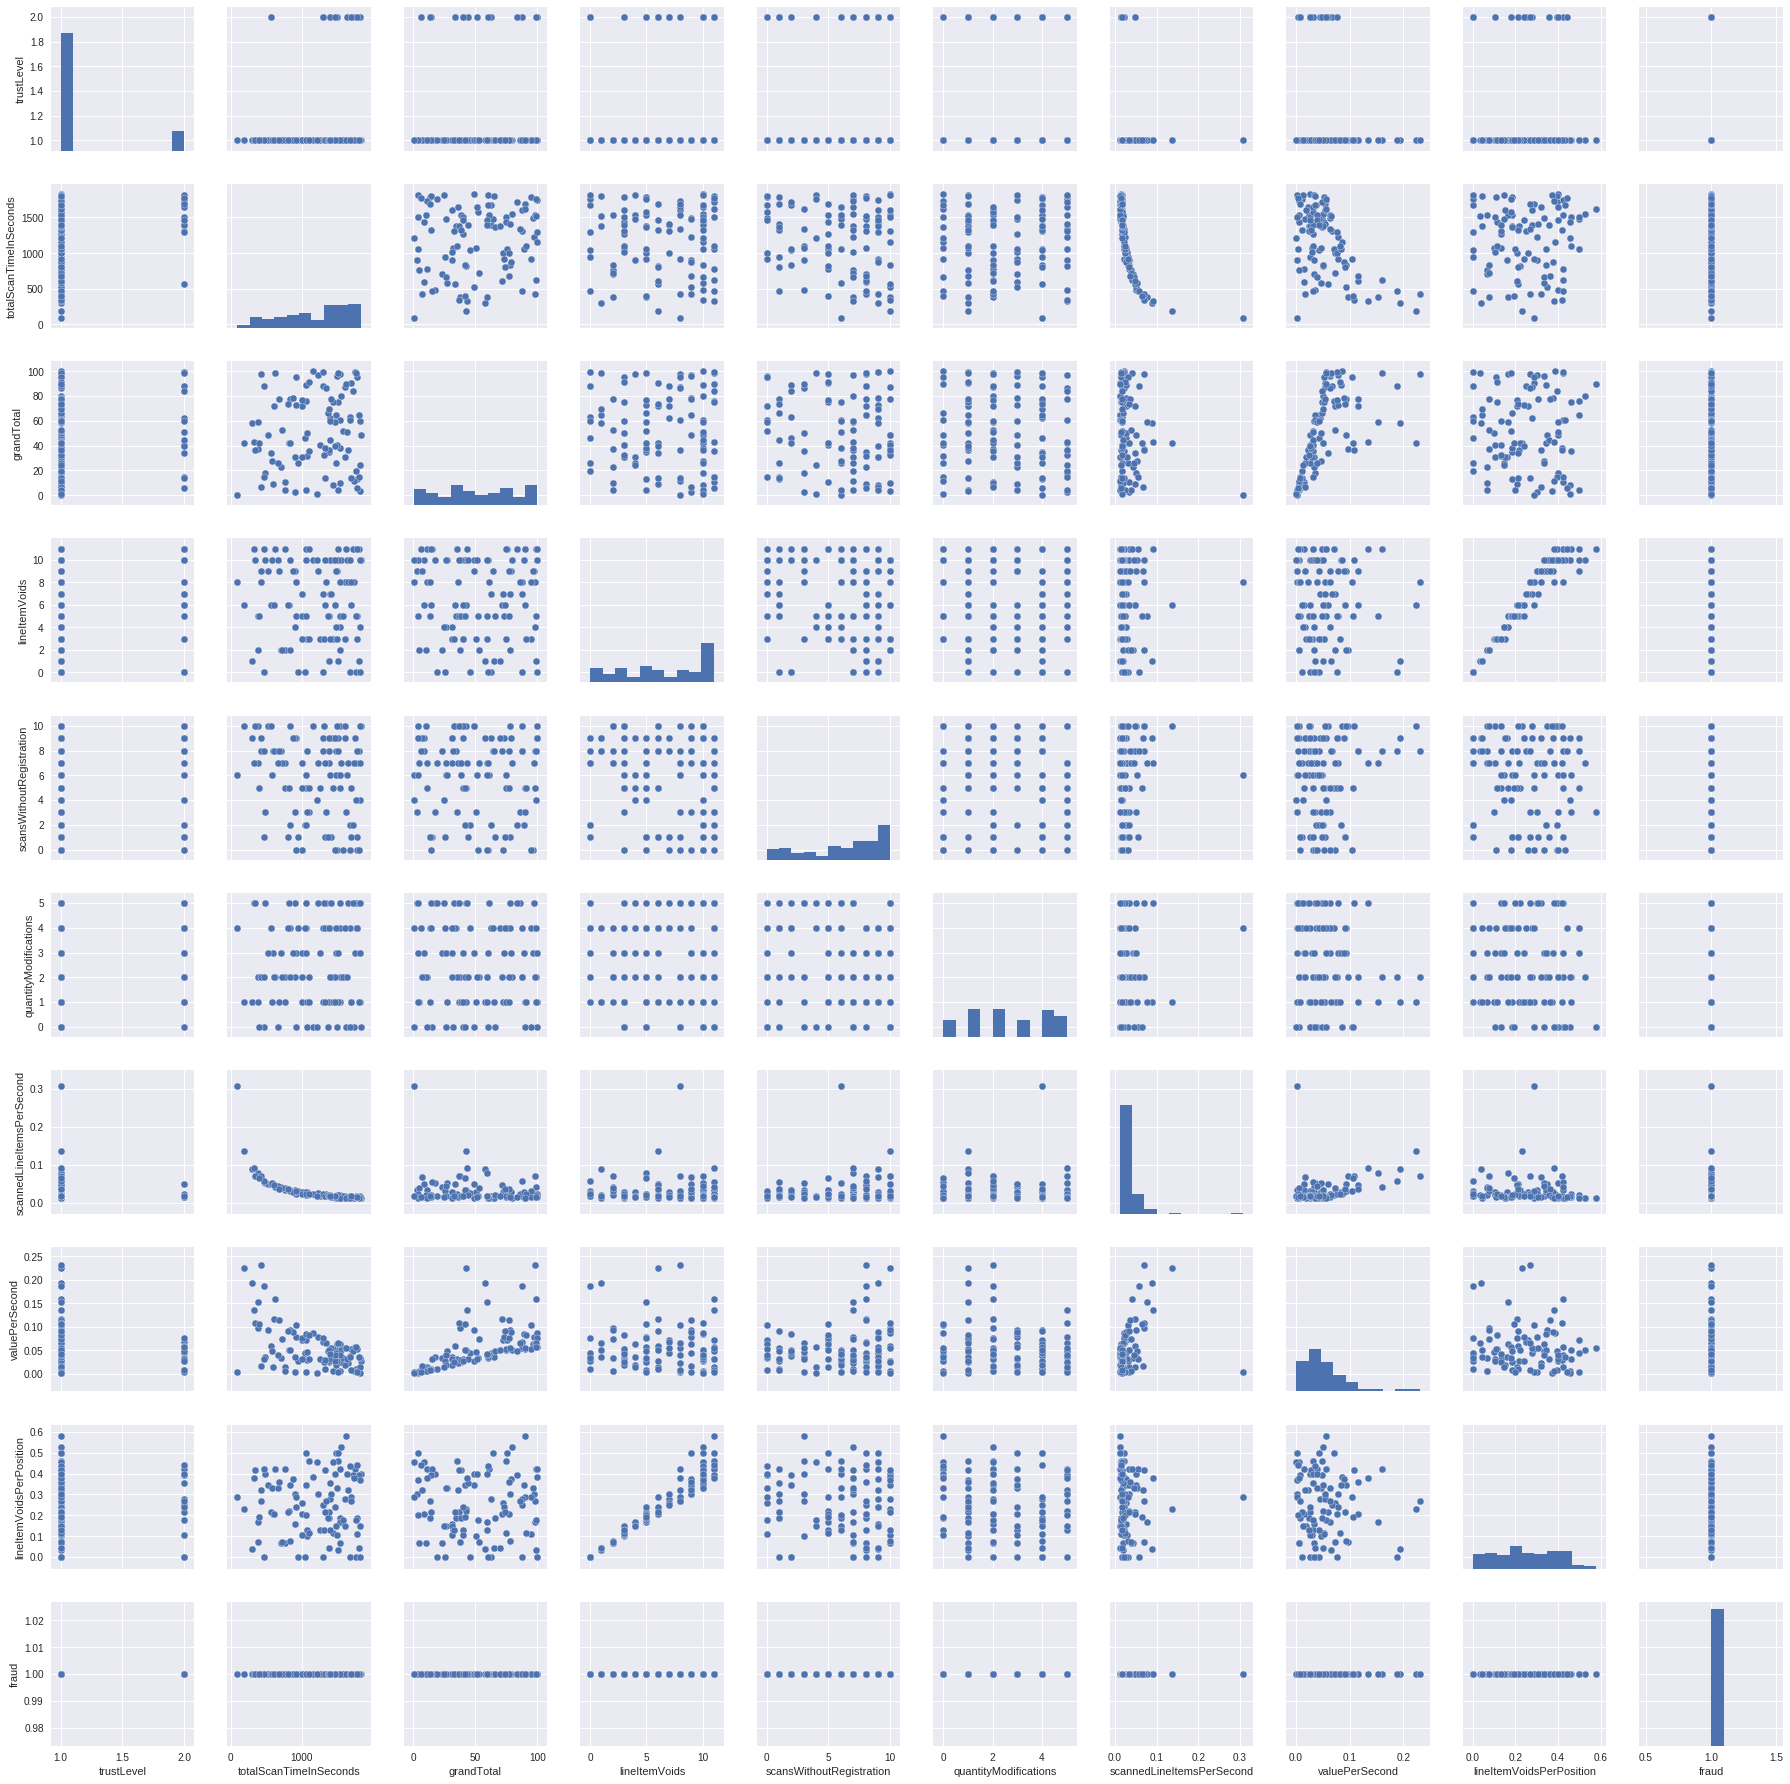

In [16]:
sns.set()
sns.pairplot(df_train_original[df_train_original["fraud"] == 1])
plt.show();

## Simple Classificator


In [0]:
# Splitting the final dataset into internal training and testing datasets
df_train_X = df_train_original.drop('fraud', axis=1)
df_train_y = df_train_original['fraud']
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train_X, df_train_y, random_state=0)

In [0]:
# Fitting the model and printing the accuracy score
model = linear_model.SGDClassifier(loss='log', max_iter=4000, tol=1e-3, random_state=0) # Random state is fixed for reproducibility
#TODO: Implement our custom loss function
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9404255319148936

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


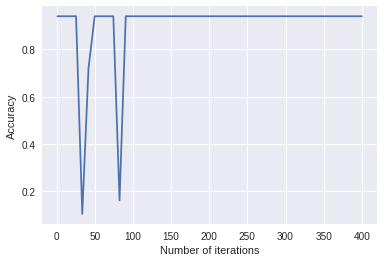

In [0]:
# Checking the convergence of the model
n_iter = np.linspace(1, 400)
scores = np.array([])
for n in n_iter:
    model = linear_model.SGDClassifier(loss='log', max_iter=n, tol=1e-3, random_state=0)
    model.fit(X_train, y_train)
    scores = np.append(scores, model.score(X_test, y_test))
    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# Printing the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[442,   0],
       [ 28,   0]])